## Inplace Heap Sort

Given an integer array of size N. Sort this array (in decreasing order) using heap sort.

Note: Space complexity should be O(1).

In [2]:
def down_heapify(arr,i,n):
    parentIndex = i
    leftChildIndex = 2*parentIndex + 1
    rightChildIndex = 2*parentIndex + 2

    while leftChildIndex < n:
        minIndex = parentIndex
        if arr[minIndex] > arr[leftChildIndex]:
            minIndex = leftChildIndex
        if rightChildIndex < n and arr[minIndex] > arr[rightChildIndex]:
            minIndex = rightChildIndex

        if minIndex == parentIndex:
            return

        arr[parentIndex],arr[minIndex] = arr[minIndex],arr[parentIndex]
        parentIndex = minIndex
        leftChildIndex = 2*parentIndex+1
        rightChildIndex = 2*parentIndex+2

def heapSort(arr):
    n = len(arr)
    for i in range(n//2-1,-1,-1):
        down_heapify(arr,i,n)

    for i in range(n-1,0,-1):
        arr[i],arr[0] = arr[0],arr[i]
        down_heapify(arr,0,i)

    return

n = input()
arr = [int(ele) for ele in input().split()]
heapSort(arr)
for ele in arr[:-1]:
    print(ele,end=' ')
print(arr[-1])

6
2 6 8 4 5 3
4 3 6 5 8 2 

## Is Binary Heap Tree

You have been given a binary tree of integers.

Your task is to check if it is a binary heap tree or not.

Note:

A binary tree is a tree in which each parent node has at most two children.

A binary heap tree has the following properties.
1. It must be a complete binary tree. In the complete binary tree every level, except the last level, is completely filled and the last level is as far left as possible.

2. Every parent must be greater than its all children nodes.
For example:
Consider this binary tree:

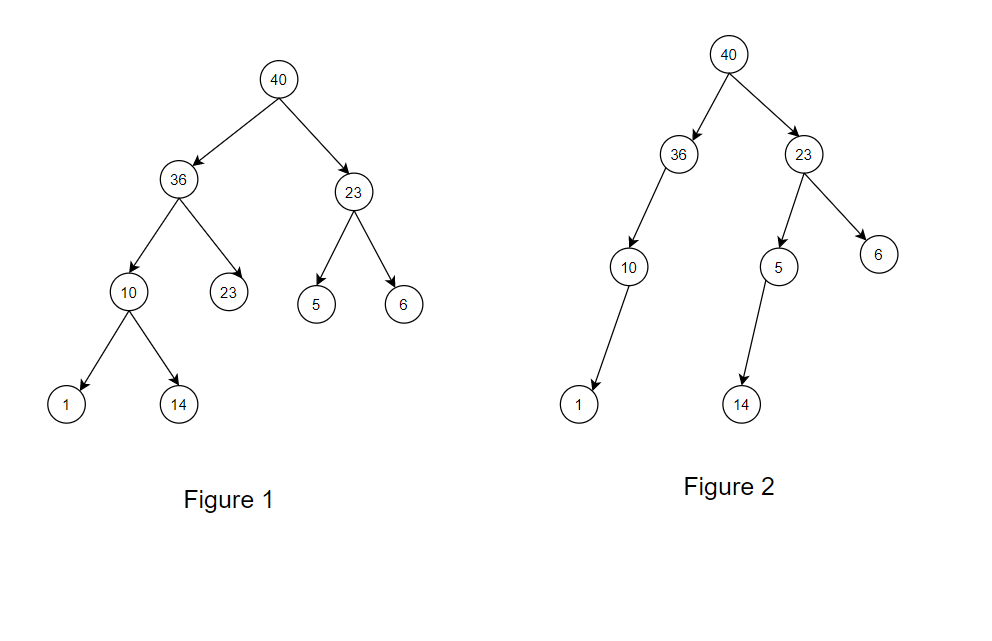

Figure 1 is a complete binary tree because every level, except the last level, is completely filled and the last nodes are as far left as possible, and the level has 2 nodes both on the left side.

Figure 2 is not a complete binary tree because level 2 (level is 0 based) is not completely filled means the right child of the node (36) is missing.
There is another reason, in the last level, there can be one another node in between node (1) and node (14) to make the binary tree as far left as possible.
Note:
1. In the world of programming two types of binary heap tree possible:
   a. Min-heap - if all parents nodes are lesser than its children nodes.
   b. Max-heap - if all parents nodes greater than its children nodes, explained in the above figure-1.

2. In this problem binary heap tree is a binary max-heap tree.

In [ ]:
from os import *
from sys import *
from collections import *
from math import *

is_heap = True
def is_leaf(node) -> bool:
    if not node.left and not node.right:
        return True
    return False

def check(node) -> int :
    global is_heap
    if is_leaf(node):
        return node.data

    if not node.left:
        is_heap=False
        return node.data

    if node.left and not node.right and not is_leaf(node.left):
        is_heap=False
        return node.data

    max_left = check(node.left)
    max_right = node.data

    if node.right:
        max_right = check(node.right)
    maxim = max(max_left,max_right,node.data)
    if node.data==maxim:
        return node.data
    else:
        is_heap = False
        return maxim

def isBinaryHeapTree(root):
    global is_heap
    is_heap=True
    check(root)
    return is_heap